In [18]:
import pandas as pd
import numpy as np
import math
from sklearn import preprocessing
%matplotlib inline

In [7]:
df = pd.read_json('walk_to_sensor.json')

In [8]:
df.head()

,alt,co,lat,lon,no2,pm2_5,volts,when
0,0,0,51.451605,-2.604315,0.02,6,3.07,2015-10-17 15:03:28
1,0,0,51.451581,-2.604273,0.00,28,3.06,2015-10-17 15:03:39
2,0,0,51.451607,-2.604294,0.00,31,3.00,2015-10-17 15:03:50
3,0,0,51.451615,-2.604296,0.04,34,2.98,2015-10-17 15:04:01
4,0,0,51.451639,-2.604254,0.03,27,3.06,2015-10-17 15:04:12


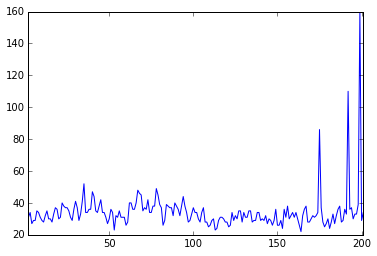

In [9]:
df[2:].pm2_5.plot()

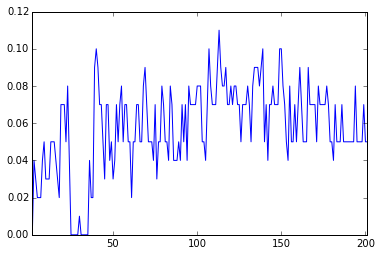

In [55]:
df[2:].no2.plot()

In [19]:
df.to_csv('sta_walk.csv')

In [20]:
pwd


u'/home/lev/Dropbox/airpublic/bristol'

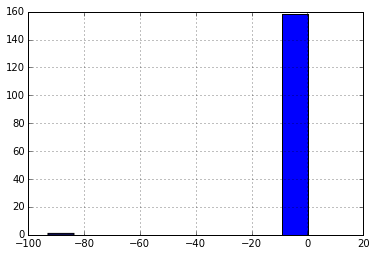

In [21]:
df.no2.hist()

In [23]:
df_clean = df[2:100]

In [ ]:
df.pm2_5.s

In [28]:
df_clean['pm_2_5_scaled'] = preprocessing.scale(df_clean.pm2_5, with_mean=True, with_std=True)

/home/lev/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:399: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function
  warnings.warn(msg, DataConversionWarning)
/home/lev/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
df.pm_2_5_scaled = df.pm2_5/ (df.pm2_5.max())

In [42]:
(df_clean.pm2_5.max())

44

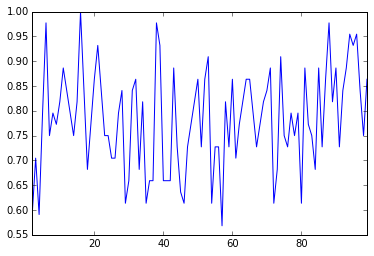

In [43]:
df_clean.pm_2_5_scaled.plot()

In [60]:
df.to_csv('walk_to_sensor.csv')

In [57]:
df.no2_mcg = (df.no2 * 1.9125*1000)

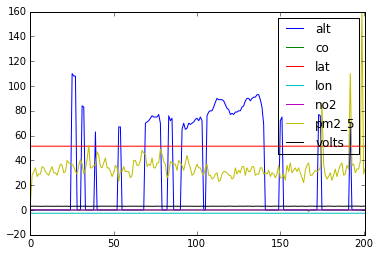

In [58]:
df.plot()

In [2]:
df = pd.read_json('bus_trip.json')

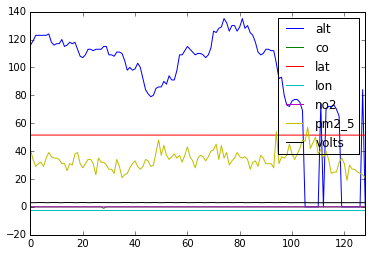

In [3]:
df.plot()

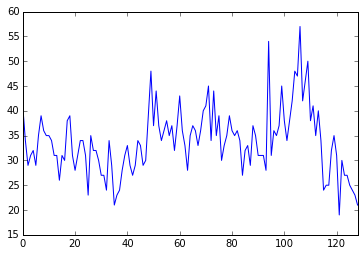

In [5]:
df.pm2_5.plot()

In [6]:
df.to_csv('bus_journey.csv')

In [70]:
def average_within_radius(df, lat, lon, radius_m=5):
    selected = pd.DataFrame()
    for _,row in df.iterrows():
        if distance_m(lat, lon, row) < radius_m:
            selected = selected.append(row)            
    return selected.mean()
            
        

In [ ]:
df.append

In [59]:
def distance_m( lat1, lon1, row):
    return vincenty( (lat1, lon1), (row['lat'], row['lon'])).meters

In [13]:
df.head()

,alt,co,lat,lon,no2,pm2_5,volts,when
0,0,0,51.451605,-2.604315,0.02,6,3.07,2015-10-17 15:03:28
1,0,0,51.451581,-2.604273,0.00,28,3.06,2015-10-17 15:03:39
2,0,0,51.451607,-2.604294,0.00,31,3.00,2015-10-17 15:03:50
3,0,0,51.451615,-2.604296,0.04,34,2.98,2015-10-17 15:04:01
4,0,0,51.451639,-2.604254,0.03,27,3.06,2015-10-17 15:04:12


In [17]:
def distance_km(lat1, lon1, lat2, lon2):
    return 6367 * 2 * np.arcsin(np.sqrt(np.sin(np.radians(lat1) - math.radians(lat2)/2)**2 + math.cos(math.radians(lat2)) * np.cos(np.radians(lat1) * np.sin(np.radians(lon1) - math.radians(lon2)/2)**2)))


In [65]:
vincenty( (51.451605 ,  -2.604315), (df.ix[0].lat, df.ix[0].lon)).meters

0.062174422828134

In [32]:
from geopy.distance import vincenty

In [36]:
import geopy

In [48]:
distance_m(df.ix[0].lat, df.ix[0].lon, df.ix[1])

3.938471623934494

In [37]:
geopy.point.

<module 'geopy.point' from '/home/lev/anaconda/lib/python2.7/site-packages/geopy/point.pyc'>

In [71]:
average_within_radius(df, df.ix[0].lat, df.ix[0].lon)

alt       0.000000
co        0.000000
lat      51.451602
lon      -2.604294
no2       0.015000
pm2_5    24.750000
volts     3.027500
dtype: float64

In [75]:
df_smoothed = df.apply(lambda x: average_within_radius(df, x.lat, x.lon), axis=1)

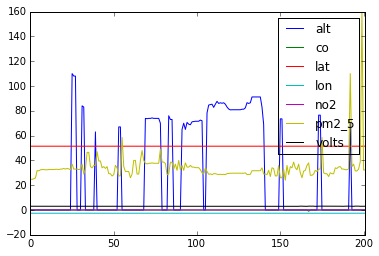

In [76]:
df_smoothed.plot()

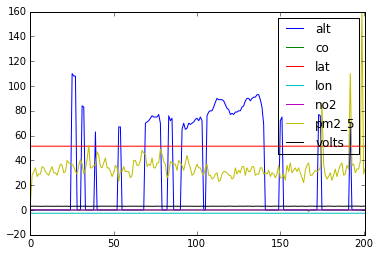

In [77]:
df.plot()

In [80]:
def smoothen(filename_in, filename_out):
    df_in = pd.read_json(filename_in)
    df_smoothed = df_in.apply(lambda x: average_within_radius(df_in, x.lat, x.lon), axis=1)
    df_smoothed.to_csv(filename_out)

In [81]:
smoothen('walk_to_sensor.json','walk_to_sensor_smooth.csv')

In [85]:
import csv
import sys

f = open('walk_to_sensor_smooth.csv', 'rt')
writer = open('all_part.js', 'wt' )

reader = csv.reader(f)

writer.write('var partPoints = [\n')
for row in reader:
	if row[5] != 'no2':
		#writer.write('[%s,%s,%.2f],\n'%(row[3],row[4],(float(row[5])*100)) )
		writer.write('[%s,%s,%s],\n'%(row[3],row[4],row[6]) )

writer.write('];')

f.close()
writer.close()


In [86]:
bristol_sensor = (112+149)/2

In [87]:
df_sensor = pd.read_csv('walk_to_sensor_smooth.csv')

In [90]:
df_sensor[df_sensor.lat == 51.45 ]

,Unnamed: 0,alt,co,lat,lon,no2,pm2_5,volts


In [91]:
df_sensor.no2_mcg = (df_sensor.no2 * 1.9125*1000)

In [92]:
df_sensor.no2_mcg

0       28.687500
1       28.687500
2       34.425000
3       35.062500
4       61.625000
5       67.440789
6       70.125000
7       73.557692
8       73.557692
9       70.125000
10      70.125000
11      73.557692
12      73.557692
13      73.557692
14      73.557692
15      74.205000
16      74.205000
17      73.557692
18      75.703125
19      75.703125
20      75.437500
21      75.703125
22      75.437500
23      74.836957
24      70.125000
25       0.000000
26       0.000000
27       0.000000
28      75.703125
29      73.557692
          ...    
172    153.000000
173    133.875000
174    133.875000
175    143.437500
176    140.250000
177    129.093750
178    129.093750
179     95.625000
180     95.625000
181    105.187500
182    105.187500
183     82.875000
184     86.062500
185     86.062500
186    133.875000
187     95.625000
188     95.625000
189     95.625000
190     95.625000
191     95.625000
192     95.625000
193     86.062500
194    153.000000
195     95.625000
196     95

In [93]:
0.07* 1.9125*1000

133.87500000000003

In [94]:
print bristol_sensor

130


In [95]:
df_sensor.pm2_5.describe()

count    202.000000
mean      33.995685
std       11.540929
min       24.000000
25%       29.333874
50%       32.615385
75%       35.000000
max      160.000000
Name: pm2_5, dtype: float64